In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(0)

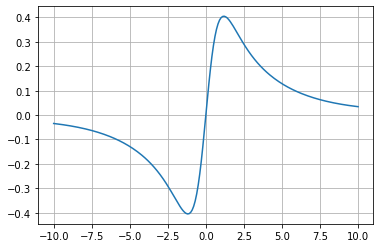

In [9]:
inputs = keras.Input(shape=(1))
l1 = layers.Dense(8, activation = 'tanh', )
l2 = layers.Dense(8, activation = 'tanh')
l3= layers.Dense(1, activation = 'linear')
outputs = l1(inputs)
outputs = l2(outputs)
outputs = l3(outputs)
# outputs = inputs**2
NN = keras.Model(inputs=inputs, outputs=outputs, name = 'control_NN')

NN.compile(loss = 'mse')
xgrid = np.linspace(-10,10,201)
y = NN.predict(xgrid)
plt.plot(xgrid,y)
plt.grid()

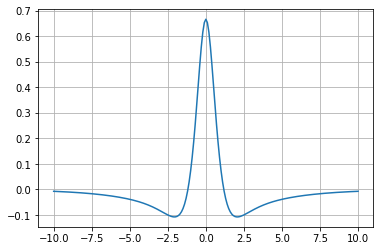

In [13]:
inputs = keras.Input(shape=(1))
with tf.GradientTape() as t:
    t.watch(inputs)
    outputs1 = NN(inputs)
# dy = 2x
outputs = t.gradient(outputs1, inputs)
test = keras.Model(inputs=inputs, outputs=outputs, name = 'control_NN')

test.compile(loss = 'mse')
xgrid = np.linspace(-10,10,201)
y = test.predict(xgrid)
plt.plot(xgrid,y)
plt.grid()

In [12]:
x = tf.constant([[1.0]])
x = inputs
# y = x ^ 2
with tf.GradientTape() as t:
    t.watch(x)
    y = NN(x)
# dy = 2x
dy_dx = t.gradient(y, x)

# dy_dx.numpy()

In [11]:
x = tf.constant([3.0, 3.0])
xx = tf.constant([1.0, 2.0])

with tf.GradientTape() as t:
    t.watch(x)
    z = tf.multiply(x, xx)

print(z)

# Find derivative of z with respect to the original input tensor x
print(t.gradient(z, x))

tf.Tensor([3. 6.], shape=(2,), dtype=float32)
tf.Tensor([1. 2.], shape=(2,), dtype=float32)
